<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Исследование-моделей." data-toc-modified-id="Исследование-моделей.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Исследование моделей.</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Проверка-модели" data-toc-modified-id="Проверка-модели-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error,  make_scorer
import collections
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.dummy import DummyRegressor
from warnings import simplefilter
monday_df = pd.DataFrame({'Минуты': [10, 3, 15, 27, 7], 
                          'СМС': [2, 5, 3, 0, 1], 
                          'Мбайты': [72, 111, 50, 76, 85]}) 
 
monday = monday_df.values
print(monday)
print(monday[3][2])
matrix = np.array([
    [1, 2, 3], 
    [4, 5, 6],
    [7, 8, 9],
    [10,11,12]])
print(matrix)

print('Строка 0:', matrix[0, :])
print('Столбец 2:', matrix[:, 2]) 

[[ 10   2  72]
 [  3   5 111]
 [ 15   3  50]
 [ 27   0  76]
 [  7   1  85]]
76
[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Строка 0: [1 2 3]
Столбец 2: [ 3  6  9 12]


In [2]:
simplefilter(action='ignore', category=FutureWarning)

In [3]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [4]:
dfs = [train,test,df_full]
for df in dfs:
    print(df.isna().sum().sum(),'пропусков')
    #display(df.head())
    #display(df.info())

30320 пропусков
2360 пропусков
36587 пропусков


In [5]:
C = train['rougher.output.concentrate_au']
F = train['rougher.input.feed_au']
T = train['rougher.output.tail_au']
train["rougher.output.recovery.calculated"] = (C * (F - T)) / (F * (C - T)) * 100
#mae = mean_absolute_error(train["rougher.output.recovery.calculated"],train['rougher.output.recovery'])
mae = (train["rougher.output.recovery.calculated"] - train["rougher.output.recovery"]).abs().sum() / len(train)
print(mae)

8.00350954615662e-15


### Вывод
Ознакомились с данными. В выборках есть некоторое количетсво пропусков, которое будет необходимо обработать.  
Значение mae очень мало, значит наши расчёты близки к реальным показателям rougher.output.recovery.

In [6]:
stage = collections.Counter()
parameter_type = collections.Counter()
parameter_name = collections.Counter()
columns = [i for i in train.columns if i not in test.columns]
for column in columns:
    features = list(map(str,column.split('.')))
    stage[features[0]] += 1
    parameter_type[features[1]] += 1
    parameter_name[features[2]] += 1
display(columns)
stage,"\n",parameter_type,"\n",parameter_name

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

(Counter({'final': 9,
          'primary_cleaner': 8,
          'rougher': 14,
          'secondary_cleaner': 4}),
 '\n',
 Counter({'output': 31, 'calculation': 4}),
 '\n',
 Counter({'concentrate_ag': 3,
          'concentrate_pb': 3,
          'concentrate_sol': 3,
          'concentrate_au': 3,
          'recovery': 3,
          'tail_ag': 4,
          'tail_pb': 4,
          'tail_sol': 4,
          'tail_au': 4,
          'sulfate_to_au_concentrate': 1,
          'floatbank10_sulfate_to_au_feed': 1,
          'floatbank11_sulfate_to_au_feed': 1,
          'au_pb_ratio': 1}))

In [7]:
train_columns = list(test.columns) + ['final.output.recovery', 'rougher.output.recovery']
train = train[train_columns].dropna()
train.shape

(12679, 55)

### Вывод  
Нашли признаки, которые недоступны в тестовой выборке из-за того, что замеряются и/или рассчитываются значительно позже. Более подробно изучили информацию об отсутсвующих столбцах.  
1) Всего пропущено 35 столбцов. Один из них rougher.output.recovery.calculated, которыймы ввели, как вспомогательный для расчета mae, здесь его можно не учитывать.  
2) Итак, из 34 пропущенных столбцов 30 это параметры, а 4 это расчётные характеристики.  

In [8]:
test = test.dropna()
train = train.dropna()
df_full = df_full.dropna()

In [9]:
dfs = [train,test,df_full]
for df in dfs:
    print(df.isna().sum().sum(),'пропусков')
    #display(df.head())
    #display(df.info())

0 пропусков
0 пропусков
0 пропусков


In [10]:
df_full_merge = df_full[["date", "rougher.output.recovery", "final.output.recovery"]]

test = test.merge(df_full_merge, on="date", how="left")
df_full_merge = df_full_merge.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)

In [11]:
train = train.drop("date", axis=1)
test = test.drop("date", axis=1)
df_full = df_full.drop("date", axis=1)

### Вывод  
Удалили пропущенные значения. Добавили к тестовой выборке необходимые столбцы. Удалили лишние столбцы.

In [12]:
test.shape

(5383, 54)

## Анализ данных

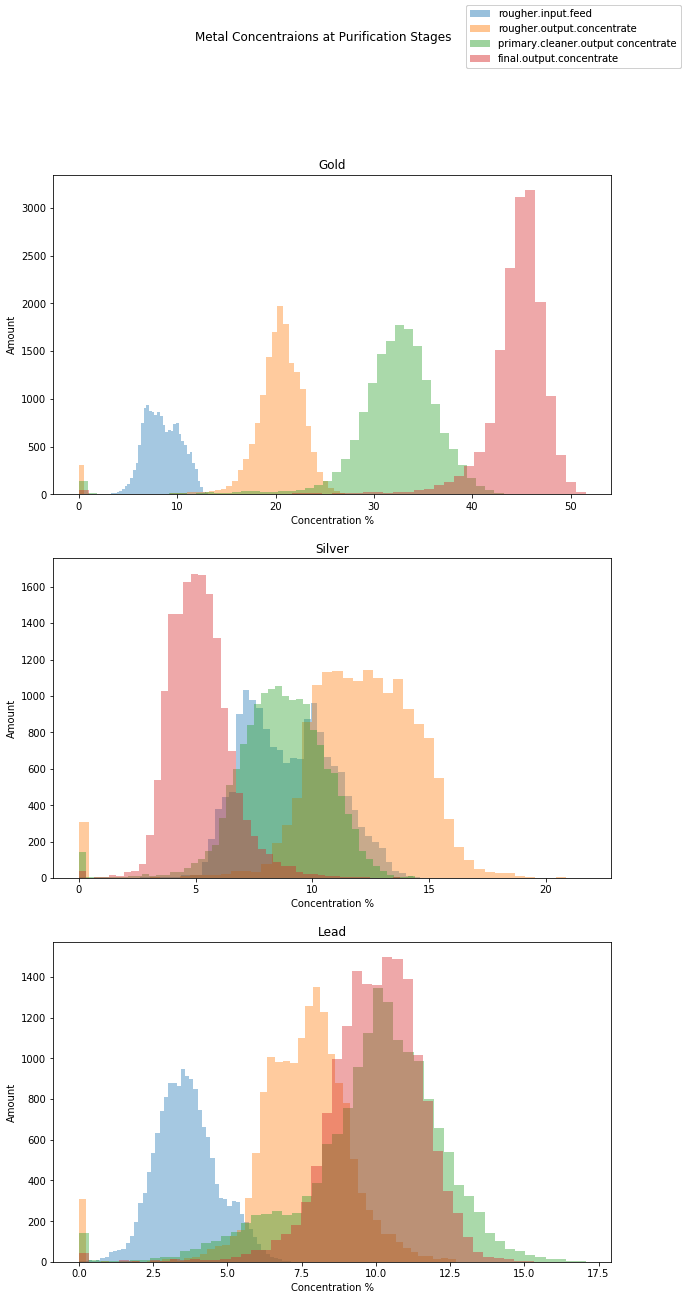

In [13]:
metal_au = df_full[["rougher.input.feed_au", "rougher.output.concentrate_au", 
                      "primary_cleaner.output.concentrate_au", "final.output.concentrate_au"]]
metal_ag = df_full[["rougher.input.feed_ag", "rougher.output.concentrate_ag", 
                      "primary_cleaner.output.concentrate_ag", "final.output.concentrate_ag"]]
metal_pb = df_full[["rougher.input.feed_pb", "rougher.output.concentrate_pb", 
                      "primary_cleaner.output.concentrate_pb", "final.output.concentrate_pb"]]
metals = [metal_au, metal_ag, metal_pb]
metals_name = ['Gold', 'Silver', 'Lead']
fig, axes = plt.subplots(3, 1, figsize=(10, 20))
i = 0
for metal,metal_name in zip(metals, metals_name):
    for column in list(metal):
        sns.distplot(metal[column], ax=axes[i], kde=False)
        axes[i].set(title=metal_name, xlabel="Concentration %", ylabel="Amount")
    fig.suptitle("Metal Concentraions at Purification Stages")
    fig.legend(["rougher.input.feed", "rougher.output.concentrate", "primary.cleaner.output concentrate", "final.output.concentrate",])
    fig.show()
    i +=1

### Вывод  
Проверили как изменяется концентарация металлов на различных этапах очистки.  
Концентрация золота и свинца к конечному этапу увеличивается, а вот с серебром наоборот, концентрация на финальном этапе меньше, чем на первом.

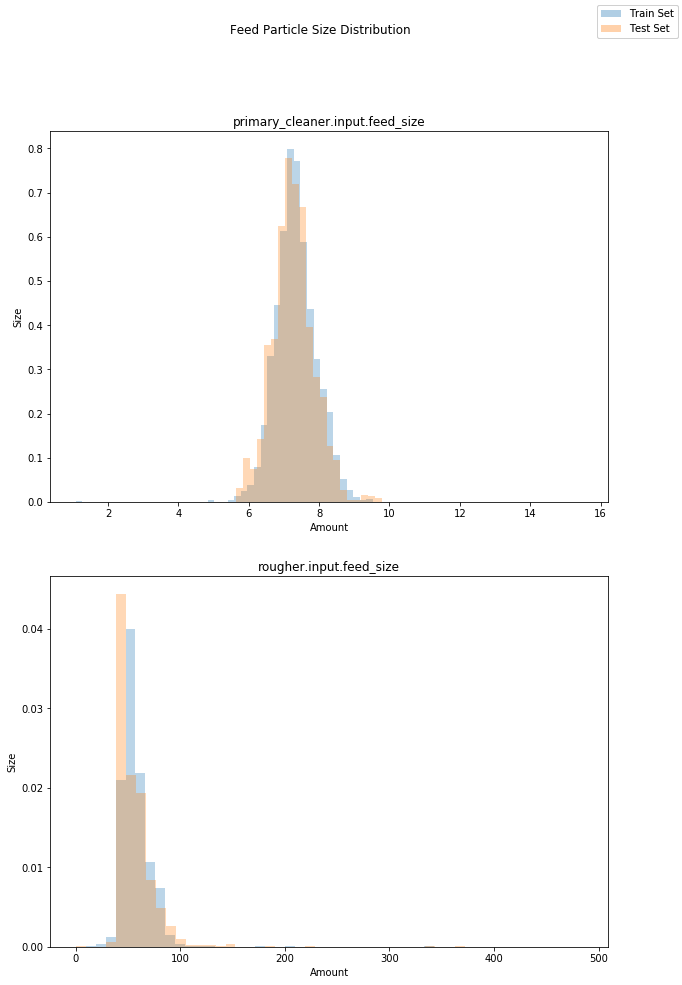

In [14]:
stages = ['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
selections = [train, test]
i = 0
fig, axes = plt.subplots(2,1, figsize=(10, 15))
for stage in stages:
    for selection in selections:
        axes[i].hist(selection[stage], density = True, alpha=0.3, bins=50)
        axes[i].set(title=stage, xlabel="Amount", ylabel="Size")
    i += 1
    fig.suptitle("Feed Particle Size Distribution")
    fig.legend(["Train Set", "Test Set"])
    fig.show()

 ### Вывод  
 Размеры гранул сырья в выборках отличаются не сильно. Можно работать дальше.

rougher.input.feed  rougher.output.concentrate  final.output.concentrate
0           14.871440                   38.395653                 58.137072
1           14.905729                   38.945647                 58.699942
2           14.638299                   38.649756                 58.927421
3           14.199305                   38.411473                 58.714815
4           13.511497                   38.867359                 59.065251

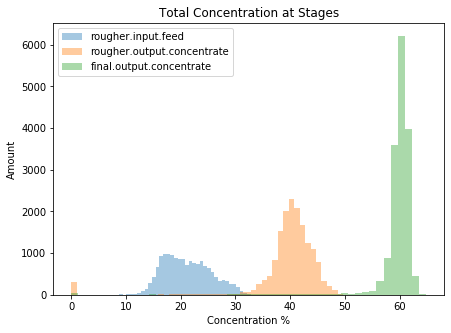

In [15]:
def feed(data):
    return data["rougher.input.feed_au"] + data["rougher.input.feed_ag"] + data["rougher.input.feed_pb"]

def rougher_concentrate(data):
    return data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_pb']

def final_concentrate(data):
    return data["final.output.concentrate_au"] + data["final.output.concentrate_ag"] + data["final.output.concentrate_pb"]

df_full["rougher.input.feed"] = feed(df_full)
df_full["rougher.output.concentrate"] = rougher_concentrate(df_full)
df_full["final.output.concentrate"] = final_concentrate(df_full)
summ_concentrate = df_full[["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]]
display(summ_concentrate.head())
concentrates = ["rougher.input.feed", "rougher.output.concentrate", "final.output.concentrate"]


fig = plt.figure(figsize=(7, 5))
for concentrate in concentrates:
    sns.distplot(df_full[concentrate], kde = False)
plt.legend(list(concentrates))
plt.title("Total Concentration at Stages")
plt.xlabel("Concentration %")
plt.ylabel("Amount")
fig.show()

In [16]:
train = train[(train['rougher.input.feed_size'] > 20) & (train['rougher.input.feed_size'] < 100)]
test = test[(test['rougher.input.feed_size'] > 20) & (test['rougher.input.feed_size'] < 100)]

In [17]:
train.shape

(12543, 54)

## Модель

Подготовим функцию для расчёта sMAPE


In [18]:
def smape(target, predictions):
    y_calc = abs(target - predictions) / ((abs(target) + abs(predictions)) / 2) * 100
    result = y_calc.sum() / len(target)
    return result
def final_smape(sample_true, sample_pred):
    rougher = smape(sample_true.iloc[:, 0], sample_pred[:,0])
    cleaner = smape(sample_true.iloc[:, 1], sample_pred[:,1])
    return 0.25 * rougher + 0.75 * cleaner

features_train = train.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_train = train[["rougher.output.recovery", "final.output.recovery"]]
features_test = test.drop(["rougher.output.recovery", "final.output.recovery"], axis=1)
target_test = test[["rougher.output.recovery", "final.output.recovery"]]
#print(target_test.shape)
#print(target_train.shape)

In [19]:
features_train.shape, features_test.shape

((12543, 52), (5282, 52))

In [20]:
feature_scaler = StandardScaler()
features_train = feature_scaler.fit_transform(features_train)

In [21]:
def smape_cv(model, features, target):
    return np.abs(np.average(cross_validate(model, features, target, scoring=smape_scorer)["test_score"]))
#print(target_test)
features_test = feature_scaler.transform(features_test)

при помощи make_scorer создадим оценщик для кросс валидации.

In [22]:
smape_scorer = make_scorer(final_smape, greater_is_better=False)

### Исследование моделей.  
Начнем с модели решающего древа. Используем метод случайного поиска для подбори гиперпараметров.

In [23]:
model1 = DecisionTreeRegressor(random_state=1)

params = {
    'max_depth':[x for x in range(1, 20, 1)], 
    'min_samples_leaf':[x for x in range(2, 20, 1)],
    'min_samples_split':[x for x in range(2, 20, 1)],
}

grid = RandomizedSearchCV(model1, params, scoring=smape_scorer, n_iter=10, random_state=1, cv=5)
grid.fit(features_train, target_train)

print('Лучший результат:')
print(grid.best_params_)
print('\nsMAPE:')
print(grid.best_score_ * (-1))
print()

Лучший результат:
{'min_samples_split': 7, 'min_samples_leaf': 16, 'max_depth': 3}

sMAPE:
10.278383934330073



Проверим модель линейной регресии

In [24]:
model2 = LinearRegression()
scores = cross_val_score(model2, features_train, target_train, cv=5, scoring=smape_scorer)
scores.mean() * (-1)

10.80538384230763

А теперь случайный лес

In [25]:
model3 = RandomForestRegressor(random_state=1)

params = {
    'n_estimators':[x for x in range(60, 61, 10)],
    'max_depth':[x for x in range(6, 7, 1)], 
    'min_samples_leaf':[x for x in range(4, 5, 1)],
    'min_samples_split':[x for x in range(9, 10, 1)],
}

grid = RandomizedSearchCV(model3, params, scoring=smape_scorer, n_iter=1, random_state=1, cv=5)
grid.fit(features_train, target_train)

print('Лучший результат:', grid.best_params_)
print('sMAPE:', grid.best_score_ * (-1) )

Лучший результат: {'n_estimators': 60, 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 6}
sMAPE: 9.450823007329902


### Вывод
Наименьший smape показала модель линейной регресии, ее и будем использовать для финальной проверки.

### Проверка модели

In [26]:
model3 = grid.best_estimator_

In [27]:
predictions = model3.predict(features_test)
final_smape(target_test, predictions)

8.233207982444068

Воспользуемся простой моделью, чтобы проверить насколько точна наша.

In [28]:
dummy_model = DummyRegressor()
dummy_model.fit(features_train, target_train)
dummy_predict = dummy_model.predict(features_test)

final_smape(target_test, dummy_predict)

8.657518718932277

### Вывод  
sMAPE на простой модели немного выше, чем на нашей, но оба значения довольно близки.

# Вывод  
Исследовали несколько моделей. Лучший результат на тренировочной выборке показала модель случайного леса, со значением sMAPE: 9.450823007329902 её и использовали для предсказания на тестовой выборке, там она показала результат 8.233207982444068, что довольно близко к простой модели.